# Lab 04
Hao-Tien Kuo

## Section 1: Group Comparisons with Continuous Data

In [1]:
import numpy as np
import pandas as pd

# Read the males_ht_wt_cntry.csv file into a data frame
df1 = pd.read_csv("males_ht_wt_cntry.csv")

In [2]:
# Display some rows to make sure it imported correctly
df1.head(10)

,Height,Weight,Country
0,64.0,144.0,Italy
1,68.0,150.0,Italy
2,66.0,147.0,Italy
3,71.0,170.0,Italy
4,65.0,163.0,Italy
5,67.0,161.0,Italy
6,65.0,147.0,Italy
7,68.0,156.0,Italy
8,69.0,149.0,Italy
9,66.0,157.0,Italy


In [3]:
print(df1['Country'].value_counts())

USA            90
Netherlands    80
Italy          70
Name: Country, dtype: int64


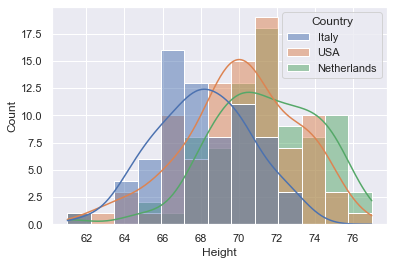

In [4]:
# Generate histograms of the heights by country
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
sns.histplot(data=df1, x='Height', hue='Country', kde=True)

plt.show()

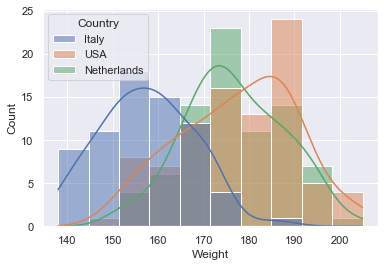

In [5]:
# Generate histograms of the weights by country
sns.histplot(data=df1, x='Weight', hue='Country', kde=True)

plt.show()

In [6]:
# Conduct a test to determine if the weights differ by nationality and interpret your results.
from scipy.stats import f_oneway, levene

w_us = df1['Weight'].loc[df1['Country']=='USA']
w_nl = df1['Weight'].loc[df1['Country']=='Netherlands']
w_it = df1['Weight'].loc[df1['Country']=='Italy']

# Check variance (Levene's test)
stat, p = levene(w_us, w_nl, w_it)
print(p)

0.07218180380373036


In [7]:
# ANOVA test
result  = f_oneway(w_us, w_nl, w_it)

# p-value
print(result.pvalue)

1.9503368513081563e-25


In [8]:
from scipy.stats import ttest_ind

# find variance for each group
print(np.var(w_it), np.var(w_nl), np.var(w_us))

# The ratios of the variances are all less than 4. We can assume that the population variances are equal.
print(np.var(w_nl) / np.var(w_it) < 4)
print(np.var(w_us) / np.var(w_it) < 4)
print(np.var(w_us) / np.var(w_nl) < 4)

101.44489795918368 118.35484374999999 162.00111111111104
True
True
True


In [9]:
# Conduct a test to determine if the weights of the Italian males were significantly different than the Dutch males
ttest_ind(a=w_it, b=w_nl, equal_var=True)

Ttest_indResult(statistic=-11.135754716464666, pvalue=2.6541621479997745e-21)

In [10]:
# Conduct a test to determine if the weights of the Italian males were significantly different than the American males
ttest_ind(a=w_it, b=w_us, equal_var=True)

Ttest_indResult(statistic=-10.715936381667479, pvalue=1.755707616976545e-20)

In [11]:
# Conduct a test to determine if the weights of the American males were significantly different than the Dutch males 
ttest_ind(a=w_us, b=w_nl, equal_var=True)

Ttest_indResult(statistic=0.39209148079725187, pvalue=0.6954875719362548)

In [34]:
# Use a multiple comparison procedure with a Tukey adjustment.
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df1['Weight'], groups=df1['Country'], alpha=0.05)
print(m_comp)

# Weights of Italian males are significantly different from the two other countries

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1      group2   meandiff p-adj  lower   upper  reject
-------------------------------------------------------------
      Italy Netherlands  19.2839 0.001 14.8583 23.7095   True
      Italy         USA  20.0048 0.001 15.6954 24.3141   True
Netherlands         USA   0.7208   0.9 -3.4342  4.8759  False
-------------------------------------------------------------


## Section 2: Group Comparisons with Categorical Data

In [12]:
# Create a new BMI column. Use the Imperial formula.
df1['BMI'] = df1['Weight']*703 / (df1['Height']**2)

In [13]:
# Create another new column ‘Overweight’ that is a 1 if BMI >= 25 and 0 otherwise.
df1['Overweight'] = np.where(df1['BMI']>=25, 1, 0)

df1.head(10)

,Height,Weight,Country,BMI,Overweight
0,64.0,144.0,Italy,24.714844,0
1,68.0,150.0,Italy,22.804931,0
2,66.0,147.0,Italy,23.723829,0
3,71.0,170.0,Italy,23.707598,0
4,65.0,163.0,Italy,27.121657,1
5,67.0,161.0,Italy,25.213411,1
6,65.0,147.0,Italy,24.459408,0
7,68.0,156.0,Italy,23.717128,0
8,69.0,149.0,Italy,22.001050,0
9,66.0,157.0,Italy,25.337695,1


In [14]:
# Create a contingency table and examine it. Describe any differences you see between nationalities.
pd.crosstab(df1['Overweight'], df1['Country'], margins = True)

Country,Italy,Netherlands,USA,All
Overweight,,,,
0,54,48,38,140
1,16,32,52,100
All,70,80,90,240


In [15]:
# Conduct a test to see if the differences are significant. Explain your findings.
from scipy.stats import chi2_contingency

# defining the table
data = pd.crosstab(df1['Overweight'], df1['Country'])
stat, p, dof, expected = chi2_contingency(data)

# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')
    
# Overweight status differs between the three countries

p value is 4.79130595387623e-05
Dependent (reject H0)


## Section 3: Regression

In [16]:
# Build a linear regression of to see whether height predicts weight. 
from sklearn import linear_model

y = df1['Weight'] # dependent variable
X = df1[['Height']] # independent variable

lm = linear_model.LinearRegression()
lm.fit(X, y) # fitting the model

lm.predict(X)

array([154.37909733, 165.79370977, 160.08640355, 174.3546691 ,
       157.23275044, 162.94005666, 157.23275044, 165.79370977,
       168.64736288, 160.08640355, 162.94005666, 162.94005666,
       180.06197532, 165.79370977, 180.06197532, 171.50101599,
       171.50101599, 165.79370977, 148.67179111, 174.3546691 ,
       180.06197532, 154.37909733, 160.08640355, 165.79370977,
       165.79370977, 168.64736288, 162.94005666, 177.20832221,
       162.94005666, 168.64736288, 162.94005666, 157.23275044,
       160.08640355, 177.20832221, 160.08640355, 160.08640355,
       157.23275044, 160.08640355, 162.94005666, 165.79370977,
       168.64736288, 171.50101599, 165.79370977, 168.64736288,
       168.64736288, 165.79370977, 171.50101599, 162.94005666,
       154.37909733, 165.79370977, 157.23275044, 171.50101599,
       177.20832221, 154.37909733, 171.50101599, 177.20832221,
       171.50101599, 165.79370977, 174.3546691 , 168.64736288,
       171.50101599, 165.79370977, 174.3546691 , 165.79

In [17]:
print(lm.score(X, y), lm.coef_, lm.intercept_)

0.3635026287541787 [2.85365311] -28.254701729405923


In [33]:
# Fit the same regression model using linear algebra. Compare your resultant beta’s to the ones you obtained earlier.
from numpy.linalg import inv

X['constant'] = 1

# calculate coefficients
b = inv(X.T.dot(X)).dot(X.T).dot(y)
print(b)

# predict using coefficients
X.dot(b)

[  2.85365311 -28.25470173]


<ipython-input-33-278431fbd8b4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['constant'] = 1


0      154.379097
1      165.793710
2      160.086404
3      174.354669
4      157.232750
          ...    
235    165.793710
236    180.061975
237    168.647363
238    171.501016
239    165.793710
Length: 240, dtype: float64